# Grandes étapes de l'algorithme (version Fortran77)


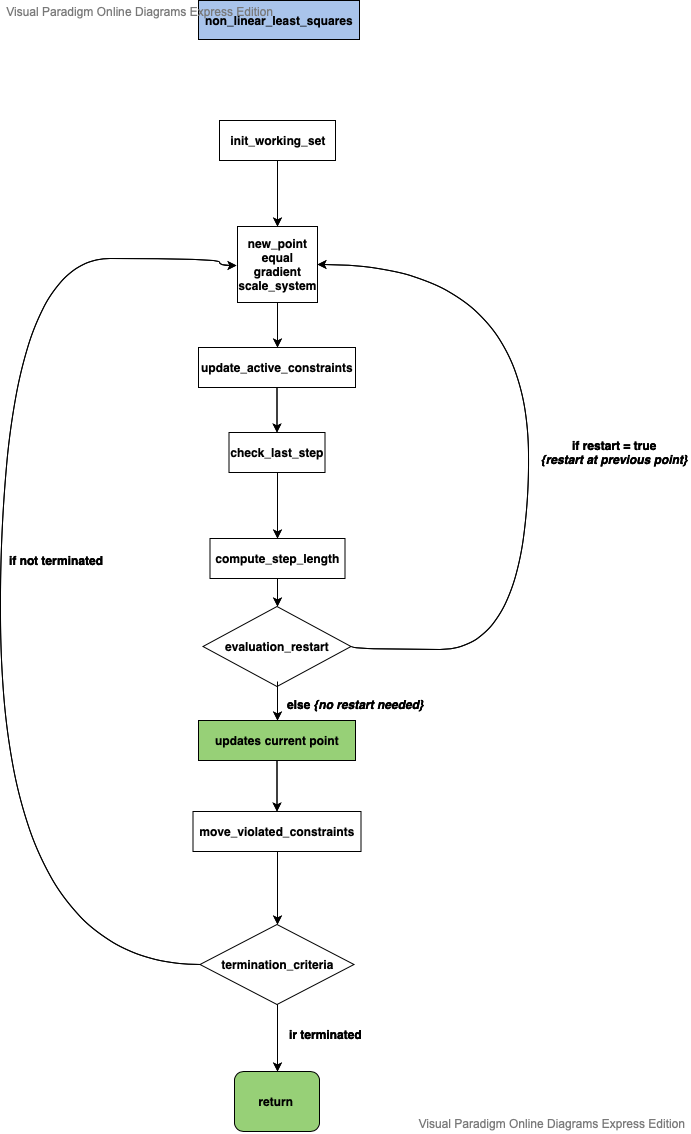


 

# Squelette du main 
(inspiré du celui développé dans l'article avec les fonctions implémentées dans la traduction Fortran-Julia)

In [ ]:
function nlcls_skeleton(objective_function, constraints, initial_point, merit_function )
    # vérification qu'il n'y pas d'erreurs dans les paramètres, pb de dimension par ex.
    # à détailler
    
    # initialisation des paramètres
    latest_step, first, phase = "GN", "GN", "normal"
    
    # not sure about p = 0 as an initial value
    k, x, p = 0, initial_point, 0

    
    # initialisation du premier workspace
    init_work_space(objective_function, contraintes);
    terminated = check_termination_criteria(objective_function, x)
    while !terminated
        # updates the system to solve with the new point
        new_point(), equal(), gradient(), scale_system()
        if phase != "Newton"
            while !terminated || !accept_direction(p_k) || phase != "Newton"
                
                # determination of working set and computation of direction are in update_active_constraints
                # computation of GN or subspace minimization search direction
                p_k = update_active_constraints()
                if !terminated
                    compute_penalty_weights(merit_function, x)
                    alpha = compute_step_length(merit_function, x, p)
                    
                    if !accept_direction(p)
                        if phase != "recovery" phase = "sighting" end
                    else
                        x = x + alpha * p
                        k += 1
                        if phase !: "recovery" phase = "normal" end
                    end
                    # in this case, check_last_step only analyses the last step
                    # moreover, it doesn't compute SUB nor Newton direction
                    phase = check_last_step(latest_step, phase, first, alpha)
                end
            end
        # use an undamped Newton type method
        else
            count = 0
            newton_failure = false
            while !terminated || !newton_failure
                pn, newton_failure = newton_search_direction(objective_function, x)
                if !terminated
                    x = x + p
                    k += 1
                end
            end
            if newton_failure
                phase, first = "recovery", "GN"
            end
        end
    end
    return x
            
                        
             
                        
                        
                        
                    
            
            
        
    
    